In [1]:
!unzip -q dataset.zip -d /content/


In [2]:
# 1-2 minutes to run
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# 2-3 min to run
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2,
                             rotation_range=15, zoom_range=0.15, horizontal_flip=True)

train = datagen.flow_from_directory('/content/dataset',
                                    target_size=(128,128), batch_size=16,
                                    class_mode='categorical', subset='training')

val = datagen.flow_from_directory('/content/dataset',
                                  target_size=(128,128), batch_size=16,
                                  class_mode='categorical', subset='validation')


Found 48 images belonging to 3 classes.
Found 12 images belonging to 3 classes.


In [4]:
# Build simple CNN
cnn = models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
    layers.MaxPool2D(),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dense(3,activation='softmax')
])
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train (short)
history_cnn = cnn.fit(train, validation_data=val, epochs=10)
# Save model
cnn.save('cnn_rice.h5')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 601ms/step - accuracy: 0.1823 - loss: 7.1257 - val_accuracy: 0.3333 - val_loss: 4.2512
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 459ms/step - accuracy: 0.3698 - loss: 3.1121 - val_accuracy: 0.3333 - val_loss: 1.7489
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 449ms/step - accuracy: 0.3620 - loss: 1.4823 - val_accuracy: 0.1667 - val_loss: 1.1308
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 451ms/step - accuracy: 0.2865 - loss: 1.1780 - val_accuracy: 0.3333 - val_loss: 1.0767
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 718ms/step - accuracy: 0.4141 - loss: 1.0793 - val_accuracy: 0.3333 - val_loss: 1.0649
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 615ms/step - accuracy: 0.4635 - loss: 1.0656 - val_accuracy: 0.3333 - val_loss: 1.0422
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 452ms/step - accuracy: 0.2734 - loss: 1.0560 - val_accuracy: 0.5000 - val_loss: 1.0710
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 470ms/step - accuracy: 0.3307 - loss: 1.0888 - val_accuracy: 0.3333 - val_loss:

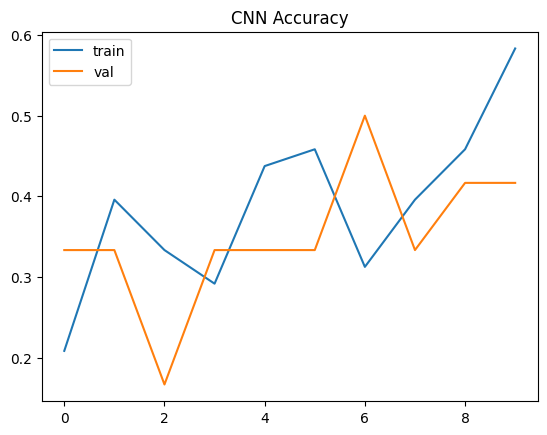

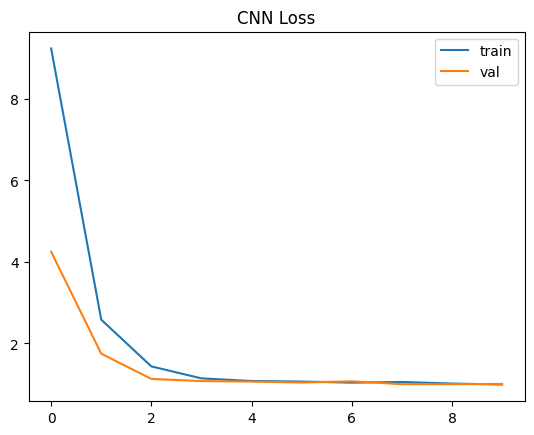

In [5]:
# Plot and save
plt.figure(); plt.plot(history_cnn.history['accuracy']); plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Accuracy'); plt.legend(['train','val']); plt.savefig('cnn_accuracy.png'); plt.show()

plt.figure(); plt.plot(history_cnn.history['loss']); plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Loss'); plt.legend(['train','val']); plt.savefig('cnn_loss.png'); plt.show()


In [6]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout

base = VGG16(weights='imagenet', include_top=False, input_shape=(128,128,3))
base.trainable = False

vgg = Sequential([base, Flatten(), Dense(256,activation='relu'), Dropout(0.5), Dense(3,activation='softmax')])
vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_vgg = vgg.fit(train, validation_data=val, epochs=7)   # 7 epochs enough for demo
vgg.save('vgg_rice.h5')


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/7
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.3542 - loss: 2.2999 - val_accuracy: 0.4167 - val_loss: 2.5738
Epoch 2/7
3/3 ━━━━━━━━━━━━━━━━━━━━ 13s 5s/step - accuracy: 0.4740 - loss: 2.6407 - val_accuracy: 0.5000 - val_loss: 1.5698
Epoch 3/7
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5495 - loss: 1.4612 - val_accuracy: 0.2500 - val_loss: 2.1111
Epoch 4/7
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.3698 - loss: 2.0458 - val_accuracy: 0.5000 - val_loss: 1.1817
Epoch 5/7
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5990 - loss: 0.9755 - val_accuracy: 0.5000 - val_loss: 1.5860
Epoch 6/7
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 4s/step - accuracy: 0.5807 - loss: 1.0501 - val_accuracy: 0.5000 - val_loss: 1.2382
Epoch 7/7
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 4s/step - accuracy: 0.6901 - loss: 1.1811 - val_accuracy: 0.4167 - val_loss: 1.2756


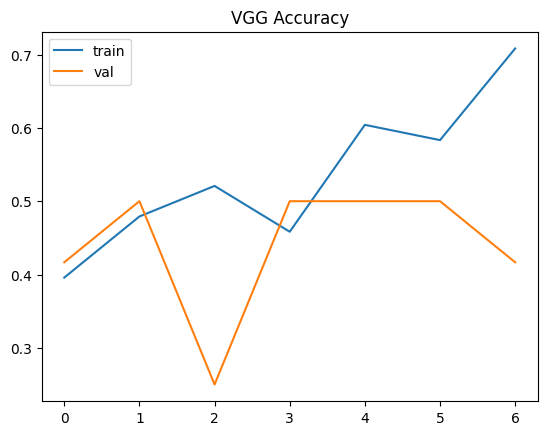

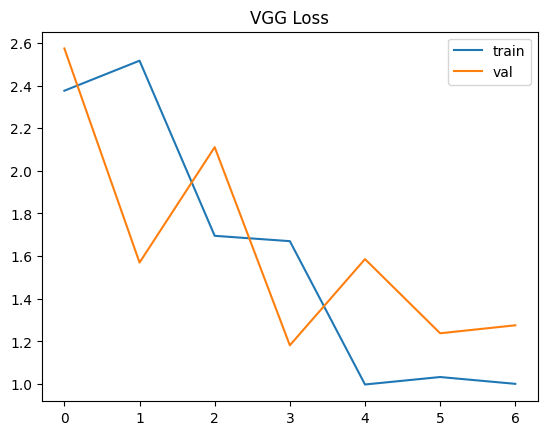

In [7]:
plt.figure(); plt.plot(history_vgg.history['accuracy']); plt.plot(history_vgg.history['val_accuracy'])
plt.title('VGG Accuracy'); plt.legend(['train','val']); plt.savefig('vgg_accuracy.png'); plt.show()

plt.figure(); plt.plot(history_vgg.history['loss']); plt.plot(history_vgg.history['val_loss'])
plt.title('VGG Loss'); plt.legend(['train','val']); plt.savefig('vgg_loss.png'); plt.show()


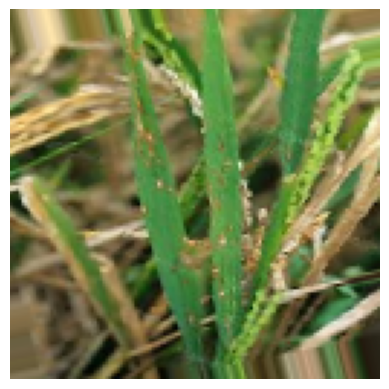

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
Predicted: BacterialBlight


In [8]:
# show one sample prediction (from validation)
x_batch, y_batch = next(val)
img = x_batch[0]
plt.imshow(img); plt.axis('off'); plt.show()
pred = vgg.predict(img.reshape(1,128,128,3))
classes = list(train.class_indices.keys())
print("Predicted:", classes[np.argmax(pred)])
